In [1]:
from sklearn.preprocessing import minmax_scale
import numpy as np
import time
from keras.preprocessing.image import ImageDataGenerator

def augment_clean(x,y):
    print ("performing cleaning and augmentation")
    start= time.time()
    y_new=y
    '''
    datagen = ImageDataGenerator()
    transform_dict1 = {'flip_horizontal':True, 'flip_vertical':False}
    transform_dict2 = {'flip_horizontal':False, 'flip_vertical':True}
    transform_list= [transform_dict1, transform_dict2]
    
    y_new = np.zeros((len(transform_list)*y.shape[0],1))
    
    #reshape so colour channel is last
    
    x_r = np.zeros((x.shape[0],x.shape[2],x.shape[2],x.shape[1]))
    
    for image in range(x.shape[0]):
        for color in range(x.shape[1]):
            x_r[image,:,:,color] = x[image,color,:,:]
    
    
    
    #apply transforms and add them to the dataset 
    
    x_aug = np.zeros((len(transform_list)*x_r.shape[0], x_r.shape[1], x_r.shape[2], x_r.shape[3]))
    print(x_aug.shape)
    for image in range(x_r.shape[0]): 
        for transform in range(len(transform_list)):
            x_aug[image + x_r.shape[0]*transform] = datagen.apply_transform(x_r[image], transform_list[transform])
            y_new[image + x_r.shape[0]*transform] = y[image]
    
    
    #reshape so colour channel is axis=1
    
    x_aug_cf = np.zeros((x_aug.shape[0],x_aug.shape[3],x_aug.shape[2],x_aug.shape[2]))
    
    for image in range(x_aug.shape[0]):
        for color in range(x_aug.shape[3]):
            x_aug_cf[image,color,:,:] = x_aug[image,:,:,color]
    print(x_aug_cf.shape)
    
    '''
    x_aug_clean=x.reshape(x.shape[0],4,101*101)
    #x_aug_clean=x_aug_cf.reshape(x_aug_cf.shape[0],4,101*101)
    
    '''#use np.clip instead
    for image in range(x_aug_cf.shape[0]):
        for color in range(x_aug_cf.shape[1]):
            if np.min(x_aug_clean[image][color]) < -15: 
                x_aug_clean= np.delete(x_aug_clean,image, axis=0)
    '''


    x_aug_clean_scaled= x_aug_clean
    for image in range(x_aug_clean.shape[0]):
        for color in range(x_aug_clean.shape[1]):
            x_aug_clean_scaled[image][color]= minmax_scale(x_aug_clean[image][color])
    
    reshaped_images= x_aug_clean_scaled.reshape((x_aug_clean_scaled.shape[0],x_aug_clean_scaled.shape[1],101,101))
    
    print("done "+ str(time.time()-start)+ " seconds")
    
    return reshaped_images , y_new

Using TensorFlow backend.


In [12]:
'''          TRY SIMULATING AND LOADING pixel.fits AGAIN IT WILL BE 200,200


This script receives .fits images from lenstool, padds them to be square arrays, 
scales them based on the image of the lensing source they are to be overlayed with,
then adds the lens and the lensing source images together and stores it in a list called "summed"

in this script you may need to change: 
-"hm_lenses"
-appened more cutouts to the list
-image_size 

'''
from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

image = fits.open("j8de44010_drz.fits")[1].data #currently this script only grabs from 1 HST image that you provide it
print("image loaded")

image_size=200
cutout_list =[]
cutout_list.append( Cutout2D(image, (3538,3591), (image_size)))
cutout_list.append( Cutout2D(image, (818,1139), (image_size)))
cutout_list.append( Cutout2D(image, (2789,889), (image_size)))
cutout_list.append( Cutout2D(image, (2633,2839), (image_size)))

padded = []
lens_scaled = []
summed = []
hm_lenses =1


for lens_number in range(hm_lenses):
    lens = fits.open("lens_image_"+ str(lens_number)+".fits")[0].data
    padded.append(np.zeros((200,200))) #assuming you set BG noise to 0
    for i in range(175):
        padded[lens_number][i+12] = lens[i] #offset by 12 to get lens right in the middle

#print(padded[0].shape)

for lens_number in range(hm_lenses):
    lens_scaled.append(padded[lens_number].reshape(-1,))
    lens_scaled[lens_number] = minmax_scale(lens_scaled[lens_number],feature_range=(cutout_list[lens_number].data.min(), cutout_list[lens_number].data.max()*0.75))
    lens_scaled[lens_number] = lens_scaled[lens_number].reshape(padded[0].shape[0],padded[0].shape[1])
#print(lens_scaled[3].shape)

for lens_number in range(hm_lenses):    
    summed.append(np.add(cutout_list[lens_number].data,lens_scaled[lens_number]))    

image loaded


IndexError: list index out of range

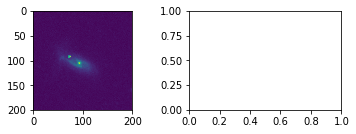

In [13]:


plt.subplot(221)
plt.imshow(summed[0])
plt.subplot(222)
plt.imshow(summed[1])
plt.subplot(223)
plt.imshow(summed[2])
plt.subplot(224)
plt.imshow(summed[3])


In [2]:
plt.imshow(summed[0])

NameError: name 'plt' is not defined

In [ ]:
lens = fits.open("pixel0.fits")[0].data
plt.subplot(221)
plt.imshow(lens) 


In [ ]:
lens.max()


In [ ]:

padded = np.zeros((200,200))
for i in range(175):
    padded[i+12] = lens[i] #offset by 12 to get lens right in the middle
print(padded.shape)
plt.imshow(padded) 


In [ ]:
from sklearn.preprocessing import minmax_scale

#normalize min max to that of real image
lens_scaled=padded.reshape(-1,)
lens_scaled = minmax_scale(lens_scaled ,feature_range=(cutout_list[0].data.max()*0.0, cutout_list[0].data.max()*0.5))
lens_scaled = lens_scaled.reshape(padded.shape[0],padded.shape[1])
plt.imshow(lens_scaled) 

In [ ]:
lens_scaled.shape

In [ ]:

image =0
summed = np.add(cutout_list[image].data,lens_scaled)
plt.imshow(summed)


resolved_summed.max()

In [ ]:
resolved_summed.max()

In [ ]:
low_noise

In [19]:
lens = fits.open("pixel0.fits")[0].data

In [20]:
lens.shape

(175, 200)

In [75]:
import random
(float(random.randint(101,151))/100.)

1.45

168